## Hypothesis Testing in Time Series

*Vinay Kumar - January' 2021*

[Contact Vinay](https://www.linkedin.com/in/vinay-k-487587200/)

### Time Series
- Time Series is sequential records of data points indexed over time stamp.
- For time series the **order** is very important to make predictions.
- **Eg.** Stock Price Prediction, Weather Forecasting etc.

Most of the time series models work on the assumption that the series is **Stationary**. This can validated by performing hypothesis testing.

**Common Terminologies**

* `Hypothesis`: Quantitative statement about the population.
* `Population`: Collection of all the data points of the dataset.
* `Sample`: A sub-section of population which reprents the dataset.
* `Stationarity`: A time series is considered to be stationary if the mean, standard deviation remain constant.
* `Trend`: A gradual increase or decrease of observations over the period of time. eg. Stock market
* `Seasonal`: Trend repeats itself over period of time. eg. Summer - Icecream production increases 

**Why do we need the time series to be stationary?**

In order to check the relationship between independent and dependent variable in time series, we need to check for stationarity.

[ADFuller Test Intuitive explanation for checking Time Series Stationarity](https://medium.com/data-science-in-your-pocket/adfuller-test-intuitive-explanation-for-checking-time-series-stationarity-1e37ce6d240e)

[Data](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

In [1]:
# import necessary packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["axes.grid"] = False

In [2]:
# load dataset
df = pd.read_csv("energydata_complete.csv", index_col=0, parse_dates=True)

In [3]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


Data is recorded for every 10 minutes. Aggregating the data mean hourly level to understand the data.

In [4]:
df = df.resample("1H").mean()
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,...,23.100000,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946
2016-05-27 15:00:00,76.666667,0.000000,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,...,23.138889,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025
2016-05-27 16:00:00,135.000000,0.000000,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,...,23.193333,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344


In [5]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
# dropping the columns we are not going to use
df = df.drop(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'rv1', 'rv2'], axis=1)
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000
2016-01-11 18:00:00,176.666667,51.666667,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333
2016-01-11 19:00:00,173.333333,25.000000,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667
2016-01-11 20:00:00,125.000000,35.000000,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667
2016-01-11 21:00:00,103.333333,23.333333,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667
...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000
2016-05-27 15:00:00,76.666667,0.000000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333
2016-05-27 16:00:00,135.000000,0.000000,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333


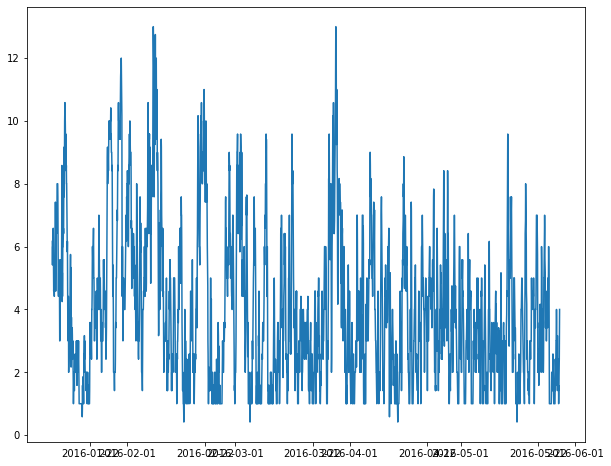

In [7]:
# plotting
plt.plot(df[["Windspeed"]])
plt.show()

#### Hypothesis Testing

In order to build time series model we need to check whether the seris is stationary or not.

- **Null Hypothesis:** Series possess a unit root, hence it is not stationary
- **Alternate Hypothesis:** Series is stationary

In [8]:
# Adfuller test (Augmented Dickie Fuller test)
for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]])
    
    if result[1] > 0.05:
        print("{} - Series is not Stationary".format(df.columns[i]))
    else:
        print("{} - Series is Stationary".format(df.columns[i]))

Appliances - Series is Stationary
lights - Series is Stationary
T_out - Series is Stationary
Press_mm_hg - Series is Stationary
RH_out - Series is Stationary
Windspeed - Series is Stationary
Visibility - Series is Stationary
Tdewpoint - Series is Stationary


**Granger Causality Test** to check what all variable time series responsible for target variable time series. In this example setting target variable as Appliances and will perform test to check what all time series has impact on Appliances time series.

**Condition**
- `1`: Cause should happen prior to effect.
- `2`: Cause should have particular information about future values of its effect.

**Hypothesis Statements**

- H0: Xt does not granger causes Yt
- H1: Xt granger causes Yt

In [9]:
max_lags = 7
y = "Appliances"

In [10]:
for i in range(len(df.columns)-1):
    results = grangercausalitytests(df[[y, df.columns[i+1]]], max_lags, verbose=False)
    p_values = [round(results[i+1][0]["ssr_ftest"][1],4) for i in range(max_lags)]
    print("Column - {}: P_values - {}".format(df.columns[i+1], p_values))

Column - lights: P_values - [0.1451, 0.0005, 0.0001, 0.0002, 0.0001, 0.0001, 0.0006]
Column - T_out: P_values - [0.002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0]
Column - Press_mm_hg: P_values - [0.0985, 0.1956, 0.0351, 0.0016, 0.0, 0.0001, 0.0]
Column - RH_out: P_values - [0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0]
Column - Windspeed: P_values - [0.0004, 0.0041, 0.0094, 0.0082, 0.0163, 0.0119, 0.0009]
Column - Visibility: P_values - [0.7071, 0.5372, 0.7338, 0.8265, 0.544, 0.3324, 0.2521]
Column - Tdewpoint: P_values - [0.4348, 0.4494, 0.5005, 0.3887, 0.05, 0.0694, 0.0992]


Here we can see that from maximum lags, the **p_Value < 0.05** for **T_out, RH_out** and **Windspeed** variable time series. So for these 3 we reject the null hypothesis and accespt the alternate hypothesis. As these variable time series does have an impact on usage of appliances (ie. Xt granger causes Yt).

This test helps to identify the features we can feed to the model for better prediction.

**Limitation of Granger Causality Test**

- It is not necessarily the true causality.
- If **X(t)** affects **Y(t)** via a third variable **Z(t)**, we may fail to find the granger causality.